# **ADVANCE MACHINE LEARNING**

In [71]:
!pip install shap
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv("adverts.csv")

In [73]:
data.head(5)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [74]:
data.keys()

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [75]:
data.shape

(402005, 12)

In [76]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None


In [77]:
data.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

# **Data Processing for Machine Learning**

 **DEALING WITH ERRONEOUS AND MISSING VALUES**

In [78]:
#replace null mileage values with 0 where condition_of_the_car is 'new'
data.loc[(data['vehicle_condition'] == 'new') & (data['mileage'].isnull()), 'mileage'] = 0

# Calculate the mean mileage for used cars
mean_mileage_used = data.loc[data['vehicle_condition'] == 'USED', 'mileage'].mean()

#Replace null mileage values for used cars with the mean mileage
data.loc[(data['vehicle_condition'] == 'USED') & (data['mileage'].isnull()), 'mileage'] = mean_mileage_used

#Replacing null values in year_of_registeration for "NEW" in vehicle_condition with 0
data.loc[(data['vehicle_condition'] == 'NEW') & (data['year_of_registration'].isnull()), 'year_of_registration'] = 2024

# Replace null values in 'reg_code' column with 0
data['reg_code'].fillna(0, inplace=True)

# droping all the rows with null values
data.dropna(inplace=True)

In [79]:
data.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0        0            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2024.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [80]:
data.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

Text(0.5, 0, 'mileage')

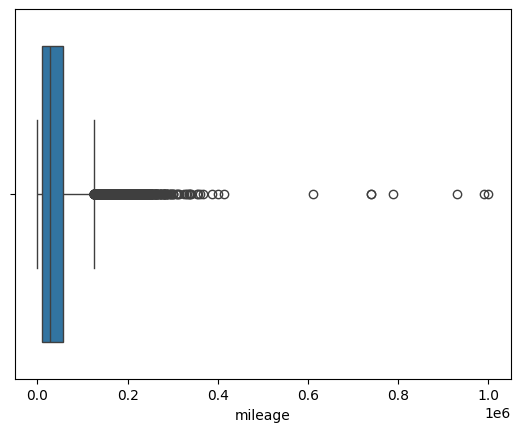

In [81]:
# Boxplot for Milage before dealing with Outliers
sns.boxplot( x='mileage' ,data= data)
plt.xlabel("mileage")

Text(0.5, 0, 'price')

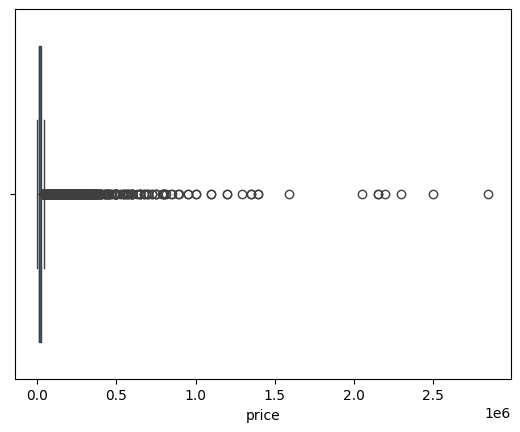

In [82]:
# Boxplot for price before dealing with Outliers
sns.boxplot( x='price' ,data= data)
plt.xlabel("price")

In [83]:
# Function to remove outliers using z-score method
data = pd.DataFrame(data)
def remove_outliers(data, columns):
    for col in columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        data = data[(z_scores < 2 )]  # Keeping only values within 3 standard deviations
    return data

In [84]:
# Columns with numeric data
numeric_columns = ['mileage', 'price']

In [85]:
# Remove outliers from numeric columns
data = remove_outliers(data, numeric_columns)

Text(0.5, 0, 'price')

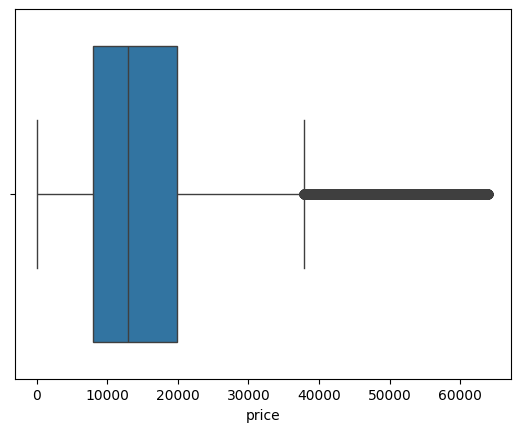

In [86]:
# Boxplot for price after dealing with Outliers
sns.boxplot( x='price' ,data= data)
plt.xlabel("price")

Text(0.5, 0, 'mileage')

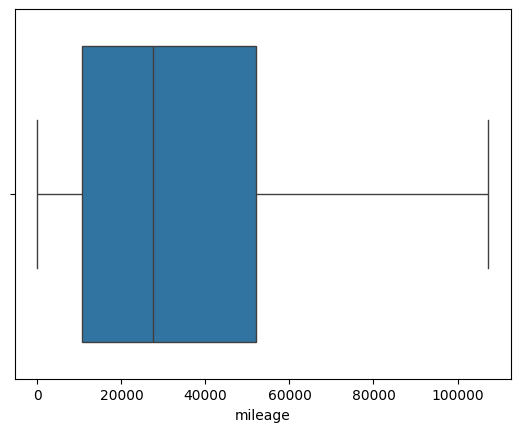

In [87]:
## Boxplot for Milage after dealing with Outliers
sns.boxplot( x='mileage' ,data= data)
plt.xlabel("mileage")

In [88]:
# Define the fraction of data you want to keep (e.g., 10%)
fraction = 0.1

# Sample a fraction of the data
data = data.sample(frac=fraction, random_state=42)

# Save the sampled data to a new CSV file
data.to_csv("sampled_data.csv", index=False)

In [89]:
data.shape

(36744, 12)

In [90]:
# dropping columns which are not important
columns_to_drop = ['public_reference', 'reg_code','crossover_car_and_van']
data = data.drop(columns=columns_to_drop, errors='ignore')
data.head()

mileage standard_colour   standard_make  standard_model  \
189107  33000.0             Red         Peugeot             108   
266517  98000.0           Black            Audi              A4   
312934      0.0             Red  DS AUTOMOBILES  DS 3 CROSSBACK   
345615  55000.0          Silver      Volkswagen            Polo   
84889   95000.0            Blue         Peugeot          308 SW   

       vehicle_condition  year_of_registration  price  body_type fuel_type  
189107              USED                2015.0   3395  Hatchback    Petrol  
266517              USED                2012.0   8195     Saloon    Diesel  
312934               NEW                2024.0  23995        SUV    Diesel  
345615              USED                2006.0   2950  Hatchback    Petrol  
84889               USED                2016.0   6990     Estate    Diesel

**categorically-encoding**

In [91]:
# performing LabelEncoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ['standard_make','standard_model','vehicle_condition', 'standard_colour', 'body_type', 'fuel_type']

le = LabelEncoder()
for cols in cat_cols:
  data[cols] = le.fit_transform(data[cols])

In [92]:
data.head()

mileage  standard_colour  standard_make  standard_model  \
189107  33000.0               16             44               3   
266517  98000.0                1              5              83   
312934      0.0               16             13             223   
345615  55000.0               17             63             441   
84889   95000.0                2             44              36   

        vehicle_condition  year_of_registration  price  body_type  fuel_type  
189107                  1                2015.0   3395          5          5  
266517                  1                2012.0   8195         12          1  
312934                  0                2024.0  23995         11          1  
345615                  1                2006.0   2950          5          5  
84889                   1                2016.0   6990          4          1

# **2. Feature Engineering**

In [93]:
# deriving features based on domain knowledge

# Create interaction term between mileage and year_of_registration
data['miles_per_year_interaction'] = data['mileage'] / (2024 - data['year_of_registration'])
data['car_age'] = 2024 - data['year_of_registration']

# Replace null values in 'miles_per_year_interaction' column with 0
data['miles_per_year_interaction'].fillna(0, inplace=True)
# Replace infinite values with 0
data.replace([np.inf, -np.inf], 0, inplace=True)

In [94]:
data.isnull().sum()

mileage                       0
standard_colour               0
standard_make                 0
standard_model                0
vehicle_condition             0
year_of_registration          0
price                         0
body_type                     0
fuel_type                     0
miles_per_year_interaction    0
car_age                       0
dtype: int64

In [95]:
#performing polynomial feature interaction
from sklearn.preprocessing import PolynomialFeatures

# Select features for polynomial interaction
features_for_interaction = ['mileage', 'year_of_registration']

# Extract the selected features
X_interaction = data[features_for_interaction]

# Initialize PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generate polynomial features
poly_features = poly.fit_transform(X_interaction)

# Create DataFrame for polynomial features
poly_feature_names = poly.get_feature_names_out(features_for_interaction)
poly_feature_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=data.index)

# Verify no null values in polynomial features
print("Polynomial features without null values:")
print(poly_feature_df)

# Concatenate the polynomial features with the original DataFrame
data_with_poly_features = pd.concat([data, poly_feature_df], axis=1)

# Verify the final DataFrame
print("Final data with polynomial features:")
print(data_with_poly_features)

Polynomial features without null values:
        mileage  year_of_registration     mileage^2  \
189107  33000.0                2015.0  1.089000e+09   
266517  98000.0                2012.0  9.604000e+09   
312934      0.0                2024.0  0.000000e+00   
345615  55000.0                2006.0  3.025000e+09   
84889   95000.0                2016.0  9.025000e+09   
...         ...                   ...           ...   
90397   20321.0                2017.0  4.129430e+08   
58746   35184.0                2016.0  1.237914e+09   
341319  25000.0                2017.0  6.250000e+08   
375775  28000.0                2015.0  7.840000e+08   
375978  15158.0                2016.0  2.297650e+08   

        mileage year_of_registration  year_of_registration^2  
189107                    66495000.0               4060225.0  
266517                   197176000.0               4048144.0  
312934                           0.0               4096576.0  
345615                   110330000.0          

# **3. Feature Selection and Dimensionality Reduction**

**Exploratory Data Analysis**

In [ ]:
# Rescaling the data
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler object
scaler = MinMaxScaler()

# Define columns to be scaled
columns_to_scale = data.columns

# Perform Min-Max scaling
data_scaled = scaler.fit_transform(data_with_poly_features)

# Create DataFrame from scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_to_scale)

In [97]:
#Splitting the data
#Splitting the data
from sklearn.model_selection import train_test_split

X = data_scaled_df.drop('price', axis=1)  # Features
y = data_scaled_df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (29395, 10) (29395,)
Testing set shape: (7349, 10) (7349,)


In [98]:
# Performing K_best
from sklearn.feature_selection import SelectKBest, f_regression

# Define the number of features you want to select (k)
k = 5  # You can adjust this as needed

# Initialize SelectKBest object with the scoring function
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Transform the test data with the selected features
X_test_selected = selector.transform(X_test)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['mileage', 'vehicle_condition', 'year_of_registration',
       'miles_per_year_interaction', 'car_age'],
      dtype='object')


In [99]:
# Importing necessary libraries
from sklearn.decomposition import PCA


# Initialize PCA object
# Set the number of components you want to keep; here, we'll keep 2 for illustration
pca = PCA(n_components=2)

# Fit and transform the scaled data with PCA
data_pca = pca.fit_transform(X_train_selected)

# Create a DataFrame for the PCA results
# Naming the components as 'PC1', 'PC2', etc.
pca_columns = [f'PC{i+1}' for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=pca_columns)

# Optionally, concatenate the PCA results with the original DataFrame
data_final = pd.concat([data_scaled_df, data_pca_df], axis=1)

# Print the final DataFrame with PCA components
print(data_final)

        mileage  standard_colour  standard_make  standard_model  \
0      0.307549             0.80       0.666667        0.004451   
1      0.913327             0.05       0.075758        0.123145   
2      0.000000             0.80       0.196970        0.330861   
3      0.512582             0.85       0.954545        0.654303   
4      0.885368             0.10       0.666667        0.053412   
...         ...              ...            ...             ...   
36739  0.189385             0.95       0.939394        0.976261   
36740  0.327903             0.80       0.075758        0.120178   
36741  0.232992             0.10       0.075758        0.120178   
36742  0.260951             0.80       0.075758        0.120178   
36743  0.141267             0.05       0.696970        0.201780   

       vehicle_condition  year_of_registration     price  body_type  \
0                    1.0              0.991220  0.047185   0.384615   
1                    1.0              0.988293  0.122

# **4. Model Building**

**4.1 A Linear Model**

R-squared: 0.417452726616497
RMSE: 0.1298570457901776
MAE: 0.0912808998125474
MSE: 0.01686285234135228


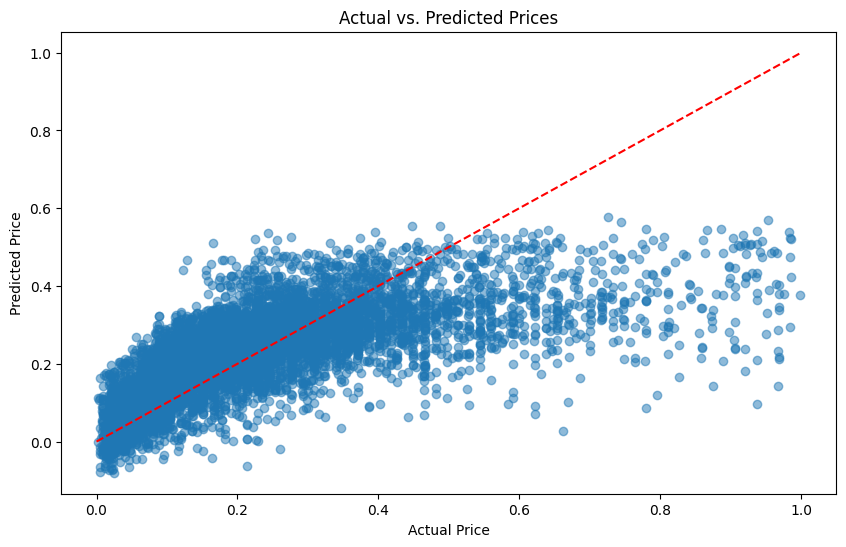

In [100]:
# Initialize and train the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

R-squared (Ridge): 0.4155124286444076
RMSE (Ridge): 0.13007312431291204
MAE (Ridge): 0.09153323051960605
MSE (Ridge): 0.016919017668522267


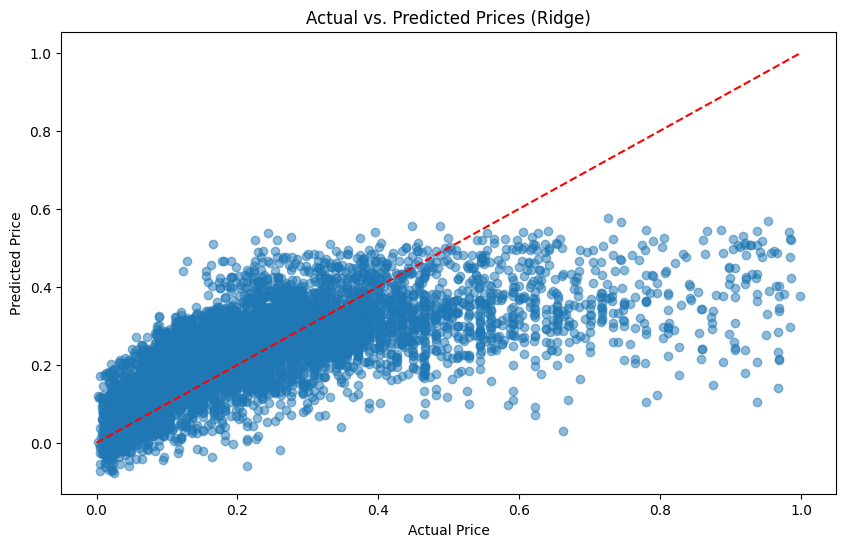

In [101]:
# Initialize RidgeCV model with cross-validation to automatically select the best alpha
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10]  # List of alpha values to try
ridge_model = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
ridge_model.fit(X_train, y_train)

# Best alpha chosen by RidgeCV
best_alpha = ridge_model.alpha_

# Predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared
r_squared_ridge = r2_score(y_test, y_pred_ridge)

# Calculate RMSE (Root Mean Squared Error)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Calculate MAE (Mean Absolute Error)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calculate MSE (Mean Squared Error)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("R-squared (Ridge):", r_squared_ridge)
print("RMSE (Ridge):", rmse_ridge)
print("MAE (Ridge):", mae_ridge)
print("MSE (Ridge):", mse_ridge)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices (Ridge)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

**4.2 A Random Forest**

R-squared (Random Forest): 0.8982418219469924
RMSE (Random Forest): 0.05427309554109823
MAE (Random Forest): 0.03195522390460783
MSE (Random Forest): 0.0029455688996131765


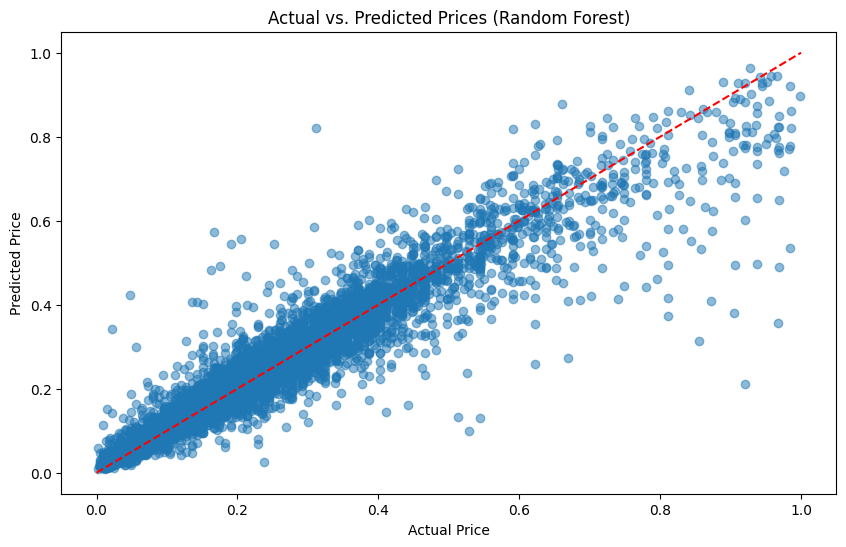

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate R-squared
r_squared_rf = r2_score(y_test, y_pred_rf)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate MSE (Mean Squared Error)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("R-squared (Random Forest):", r_squared_rf)
print("RMSE (Random Forest):", rmse_rf)
print("MAE (Random Forest):", mae_rf)
print("MSE (Random Forest):", mse_rf)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
R-squared (Random Forest - GridSearchCV): 0.8928874905820481
RMSE (Random Forest - GridSearchCV): 0.05568266705128558
MAE (Random Forest - GridSearchCV): 0.03241131026365948
MSE (Random Forest - GridSearchCV): 0.0031005594099443247


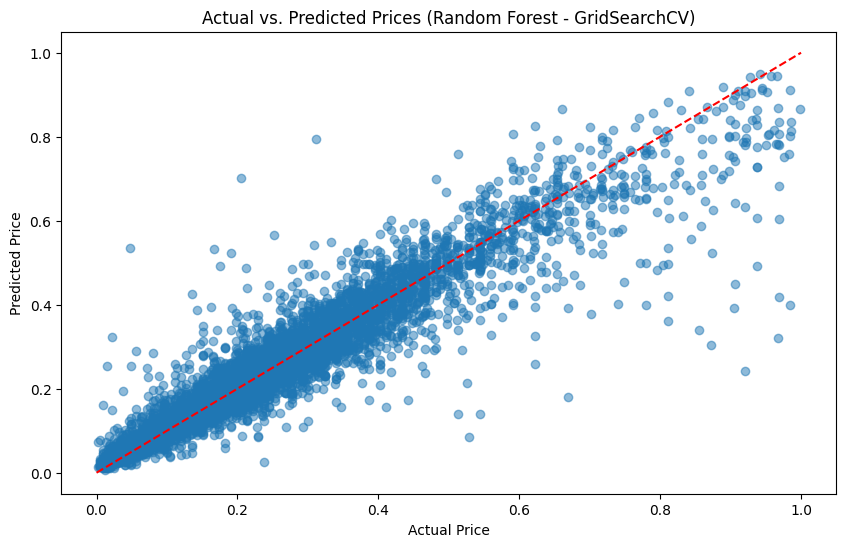

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5, 10, 20],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred_rf_grid = best_rf_model.predict(X_test)

# Calculate R-squared
r_squared_rf_grid = r2_score(y_test, y_pred_rf_grid)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf_grid = np.sqrt(mean_squared_error(y_test, y_pred_rf_grid))

# Calculate MAE (Mean Absolute Error)
mae_rf_grid = mean_absolute_error(y_test, y_pred_rf_grid)

# Calculate MSE (Mean Squared Error)
mse_rf_grid = mean_squared_error(y_test, y_pred_rf_grid)

print("Best parameters:", grid_search.best_params_)
print("R-squared (Random Forest - GridSearchCV):", r_squared_rf_grid)
print("RMSE (Random Forest - GridSearchCV):", rmse_rf_grid)
print("MAE (Random Forest - GridSearchCV):", mae_rf_grid)
print("MSE (Random Forest - GridSearchCV):", mse_rf_grid)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_grid, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices (Random Forest - GridSearchCV)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

**4.3 A Boosted Tree**

R-squared (Boosted Tree): 0.7599319444222691
RMSE (Boosted Tree): 0.08336180681153202
MAE (Boosted Tree): 0.05164376317182319
MSE (Boosted Tree): 0.006949190834883187


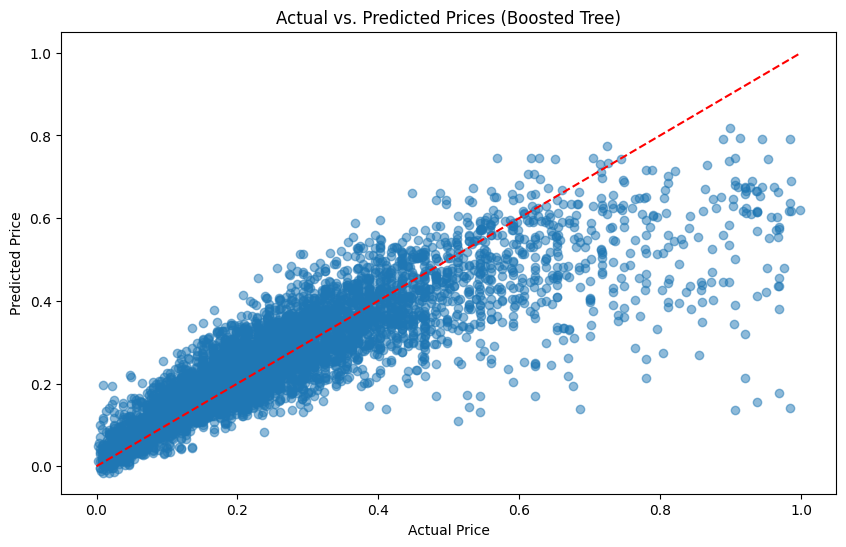

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
boosted_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
boosted_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_boosted = boosted_regressor.predict(X_test)

# Calculate R-squared
r_squared_boosted = r2_score(y_test, y_pred_boosted)

# Calculate RMSE (Root Mean Squared Error)
rmse_boosted = np.sqrt(mean_squared_error(y_test, y_pred_boosted))

# Calculate MAE (Mean Absolute Error)
mae_boosted = mean_absolute_error(y_test, y_pred_boosted)

# Calculate MSE (Mean Squared Error)
mse_boosted = mean_squared_error(y_test, y_pred_boosted)

print("R-squared (Boosted Tree):", r_squared_boosted)
print("RMSE (Boosted Tree):", rmse_boosted)
print("MAE (Boosted Tree):", mae_boosted)
print("MSE (Boosted Tree):", mse_boosted)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_boosted, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices (Boosted Tree)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
R-squared (Boosted Tree - GridSearchCV): 0.860704784959171
RMSE (Boosted Tree - GridSearchCV): 0.06349916737636124
MAE (Boosted Tree - GridSearchCV): 0.03942940160707705
MSE (Boosted Tree - GridSearchCV): 0.004032144257491139


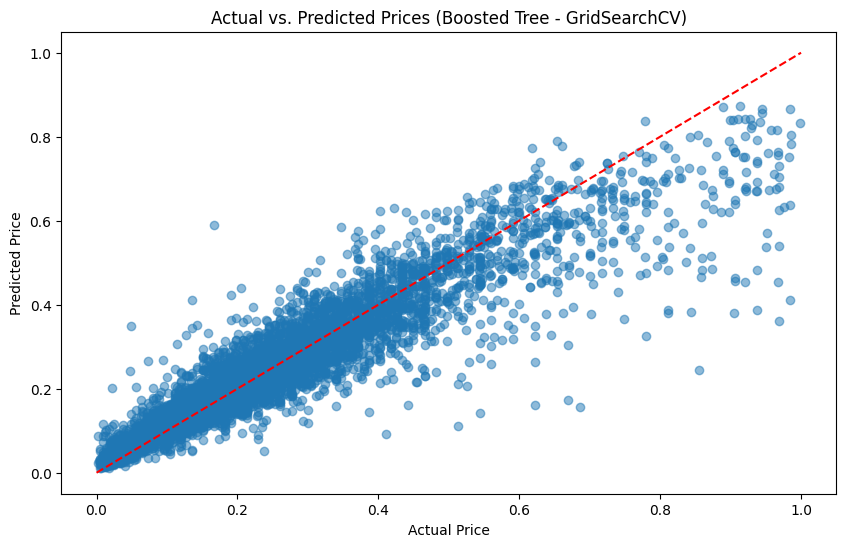

In [105]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_boosted = {
    'n_estimators': [5, 10, 20],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Gradient Boosting Regressor
boosted_regressor = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_boosted = GridSearchCV(estimator=boosted_regressor, param_grid=param_grid_boosted, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid_search_boosted.fit(X_train, y_train)

# Get the best model
best_boosted_model = grid_search_boosted.best_estimator_

# Predictions on the test set
y_pred_boosted_grid = best_boosted_model.predict(X_test)

# Calculate R-squared
r_squared_boosted_grid = r2_score(y_test, y_pred_boosted_grid)

# Calculate RMSE (Root Mean Squared Error)
rmse_boosted_grid = np.sqrt(mean_squared_error(y_test, y_pred_boosted_grid))

# Calculate MAE (Mean Absolute Error)
mae_boosted_grid = mean_absolute_error(y_test, y_pred_boosted_grid)

# Calculate MSE (Mean Squared Error)
mse_boosted_grid = mean_squared_error(y_test, y_pred_boosted_grid)

print("Best parameters:", grid_search_boosted.best_params_)
print("R-squared (Boosted Tree - GridSearchCV):", r_squared_boosted_grid)
print("RMSE (Boosted Tree - GridSearchCV):", rmse_boosted_grid)
print("MAE (Boosted Tree - GridSearchCV):", mae_boosted_grid)
print("MSE (Boosted Tree - GridSearchCV):", mse_boosted_grid)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_boosted_grid, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices (Boosted Tree - GridSearchCV)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

**4.4 An Averager/Voter/Stacker Ensemble**

R-squared (Ensemble): 0.7918068854374913
RMSE (Ensemble): 0.07763063038246541
MAE (Ensemble): 0.049882621024428336
MSE (Ensemble): 0.0060265147735789615


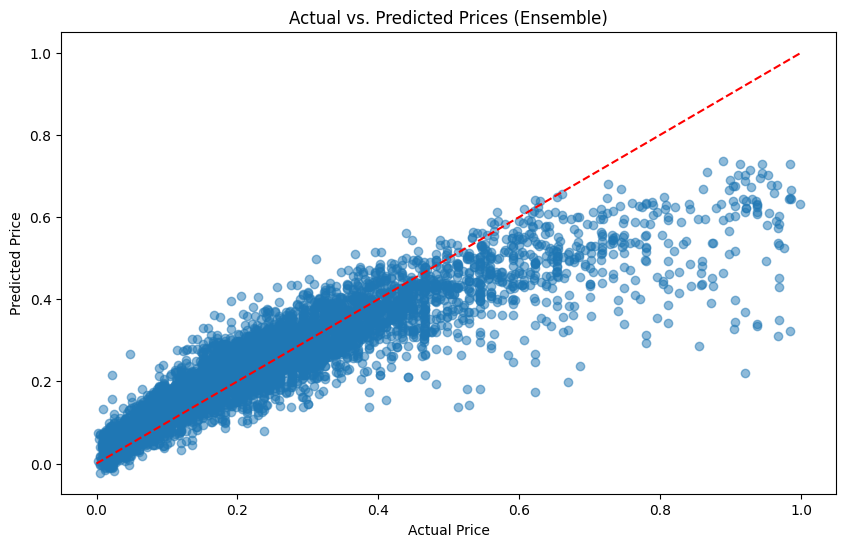

In [107]:
# Create the ensemble using voting
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(estimators=[('LinerModel', lr_model), ('RandomForest', rf_regressor), ('boosted', boosted_regressor)])

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predictions on the test set
y_pred_ensemble = ensemble.predict(X_test)

# Calculate R-squared
r_squared_ensemble = r2_score(y_test, y_pred_ensemble)

# Calculate RMSE (Root Mean Squared Error)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))

# Calculate MAE (Mean Absolute Error)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Calculate MSE (Mean Squared Error)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

print("R-squared (Ensemble):", r_squared_ensemble)
print("RMSE (Ensemble):", rmse_ensemble)
print("MAE (Ensemble):", mae_ensemble)
print("MSE (Ensemble):", mse_ensemble)

# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.5)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Prices (Ensemble)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# **5. Model Evaluation and Analysis**

**5.1 Overall Performance with Cross-Validation**

In [110]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define a function to calculate RMSE, MAE, and MSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Define the scorer for cross-validation
scoring = {'r_squared': 'r2',
           'rmse': make_scorer(rmse, greater_is_better=False),
           'mae': make_scorer(mae, greater_is_better=False),
           'mse': make_scorer(mse, greater_is_better=False)}
# Models
models = {
    'linear Regression': lr_model,
    'Random Forest': rf_regressor,
    'Gradient Boosting': boosted_regressor,
    'Ensemble': ensemble
}

results = {}
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)
    results[name] = cv_results


# Print the average scores
for name, result in results.items():
    print(f"{name}:")
    print("  R-squared:", np.mean(result['test_r_squared']))
    print("  RMSE:", -np.mean(result['test_rmse']))
    print("  MAE:", -np.mean(result['test_mae']))
    print("  MSE:", -np.mean(result['test_mse']))
    print()

linear Regression:
  R-squared: 0.3321815962509898
  RMSE: 0.13869504857656367
  MAE: 0.0927185713074184
  MSE: 0.01939180579820323

Random Forest:
  R-squared: 0.8981730220609256
  RMSE: 0.05447142334852935
  MAE: 0.03229456497290128
  MSE: 0.0029688518808434878

Gradient Boosting:
  R-squared: 0.7614398138220956
  RMSE: 0.08340124057702794
  MAE: 0.0524445999473343
  MSE: 0.006959358317177822

Ensemble:
  R-squared: 0.7807873471799666
  RMSE: 0.07988326461808296
  MAE: 0.051212159945120496
  MSE: 0.006386343358130311



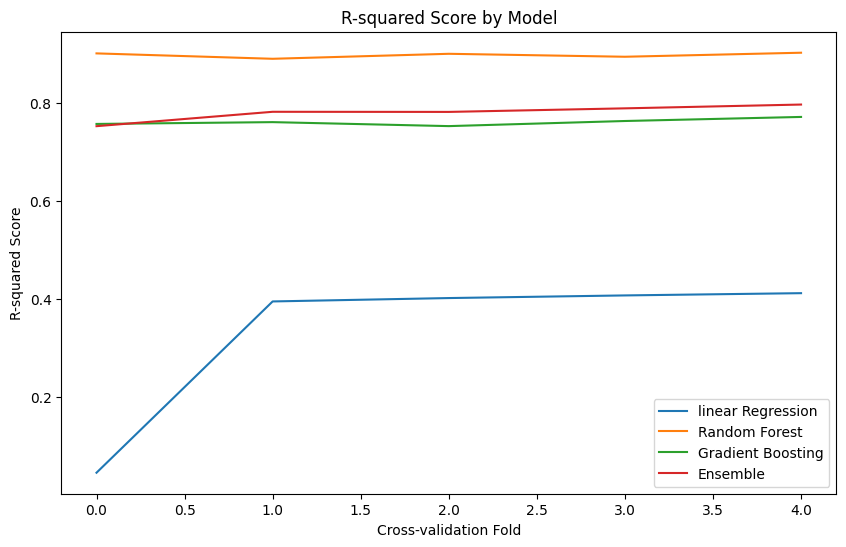

In [111]:
# Visualize the results
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(result['test_r_squared'], label=name)
plt.title('R-squared Score by Model')
plt.xlabel('Cross-validation Fold')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()

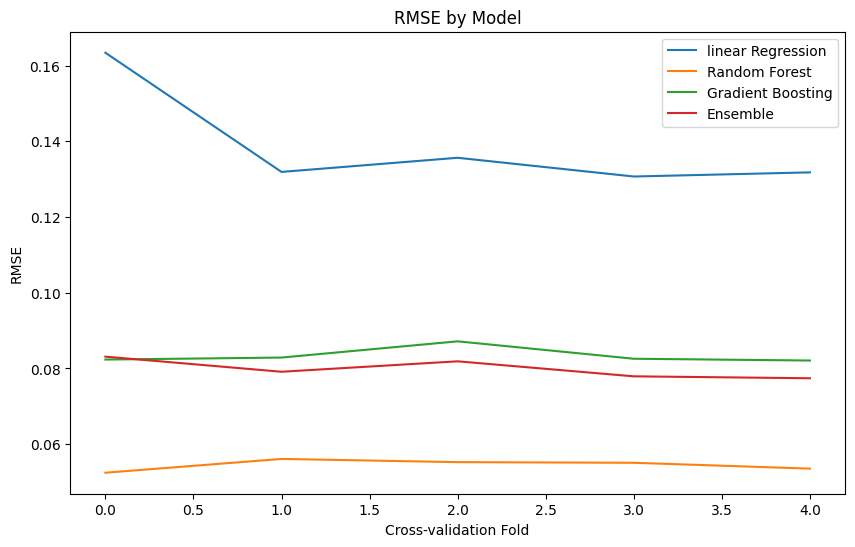

In [112]:
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(-result['test_rmse'], label=name)
plt.title('RMSE by Model')
plt.xlabel('Cross-validation Fold')
plt.ylabel('RMSE')
plt.legend()
plt.show()

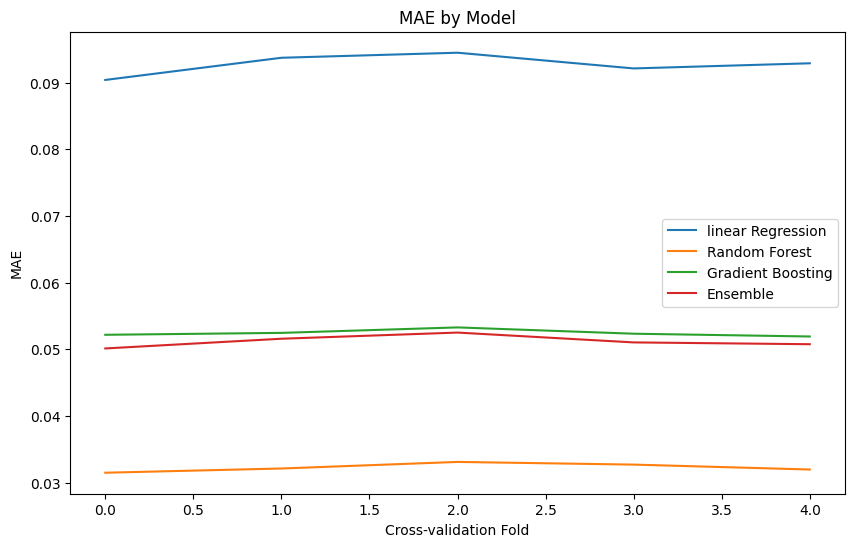

In [113]:
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(-result['test_mae'], label=name)
plt.title('MAE by Model')
plt.xlabel('Cross-validation Fold')
plt.ylabel('MAE')
plt.legend()
plt.show()

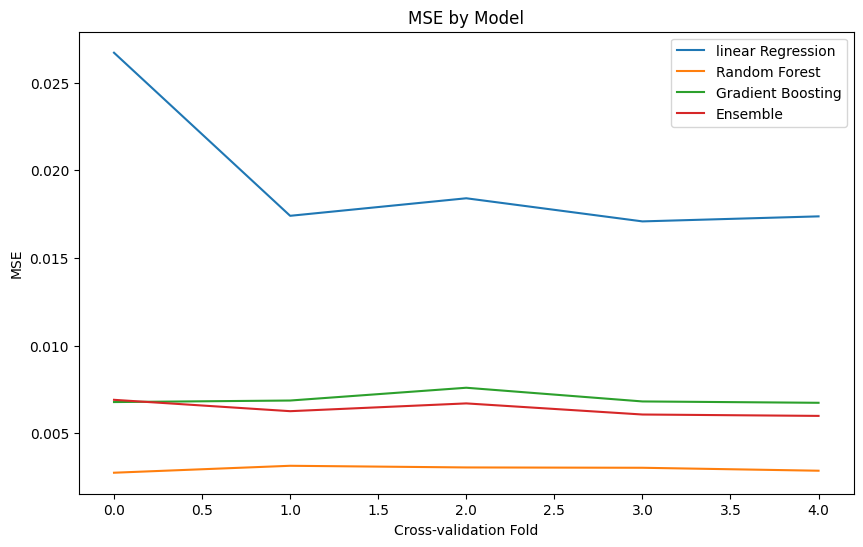

In [114]:
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(-result['test_mse'], label=name)
plt.title('MSE by Model')
plt.xlabel('Cross-validation Fold')
plt.ylabel('MSE')
plt.legend()
plt.show()

**5.2 True vs Predicted Analysis**

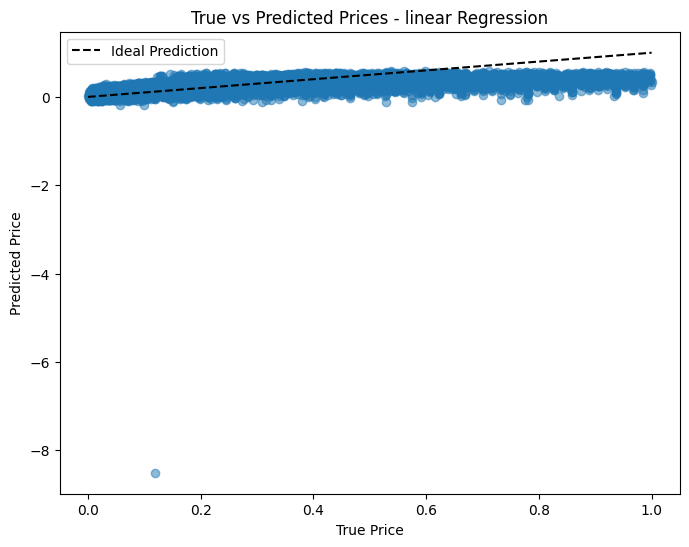

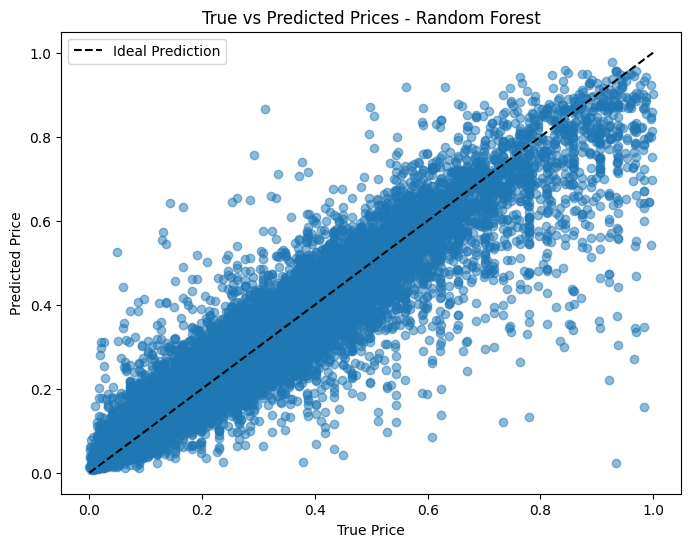

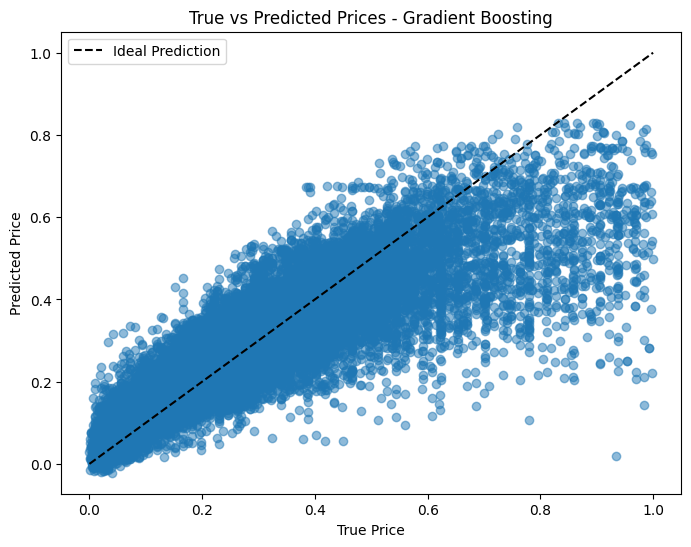

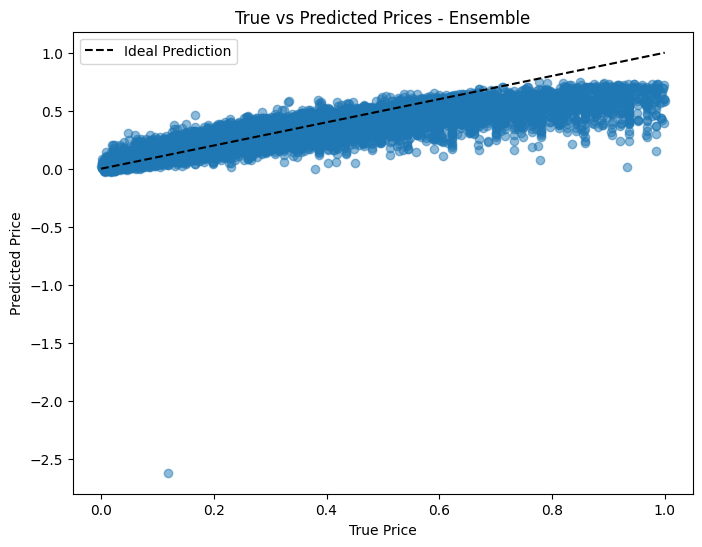

In [116]:
# Make predictions on the test set for each model
predictions = {}
for name, model in models.items():
    predictions[name] = cross_val_predict(model, X, y, cv=5)

# Create separate visualizations for each model
for name, prediction in predictions.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y, prediction, alpha=0.5)
    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='black', label='Ideal Prediction')
    plt.title(f'True vs Predicted Prices - {name}')
    plt.xlabel('True Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()

**5.3 Global and Local Explanations with SHAP**

In [117]:
# for linearRegression Model
import shap

# Fit each model
model = lr_model
model = model.fit(X_train, y_train)

eval_results = cross_validate(
    model, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
print(-eval_results['test_score'].mean(), eval_results['test_score'].std())
print(-eval_results['train_score'].mean(), eval_results['train_score'].std())



0.09286225976596277 0.0013590481004410926
0.09265736541432486 0.0005642955295995084


In [118]:
coefs = pd.DataFrame({
  'feature': X.columns,
  'coefficient': np.round(model.coef_, 3)
})
coefs

feature  coefficient
0                     mileage       -0.356
1             standard_colour       -0.030
2               standard_make       -0.093
3              standard_model        0.051
4           vehicle_condition       -0.125
5        year_of_registration        0.403
6                   body_type        0.104
7                   fuel_type       -0.074
8  miles_per_year_interaction        0.175
9                     car_age       -0.403

In [120]:
explainer = shap.LinearExplainer(model, X_train)

shap_values = explainer(X_test)
# these are the SHAP values themselves that we can always use as a dataset


In [121]:
shap_values.values
# for a random instance

array([[-0.07791696,  0.01441824,  0.00283006, ...,  0.02785171,
         0.0133133 , -0.0013209 ],
       [ 0.08811062,  0.00374935, -0.03396072, ..., -0.01466998,
        -0.01694073,  0.00103785],
       [ 0.08902894, -0.01301604, -0.03113066, ..., -0.01466998,
        -0.01740137,  0.00103785],
       ...,
       [-0.07639195,  0.01441824,  0.01273527, ...,  0.02785171,
         0.02940635, -0.00014153],
       [ 0.11589239,  0.01289411, -0.0141503 , ..., -0.01466998,
        -0.03087644,  0.00300348],
       [-0.05132205,  0.01441824, -0.03396072, ..., -0.01466998,
         0.00407233, -0.00171403]])

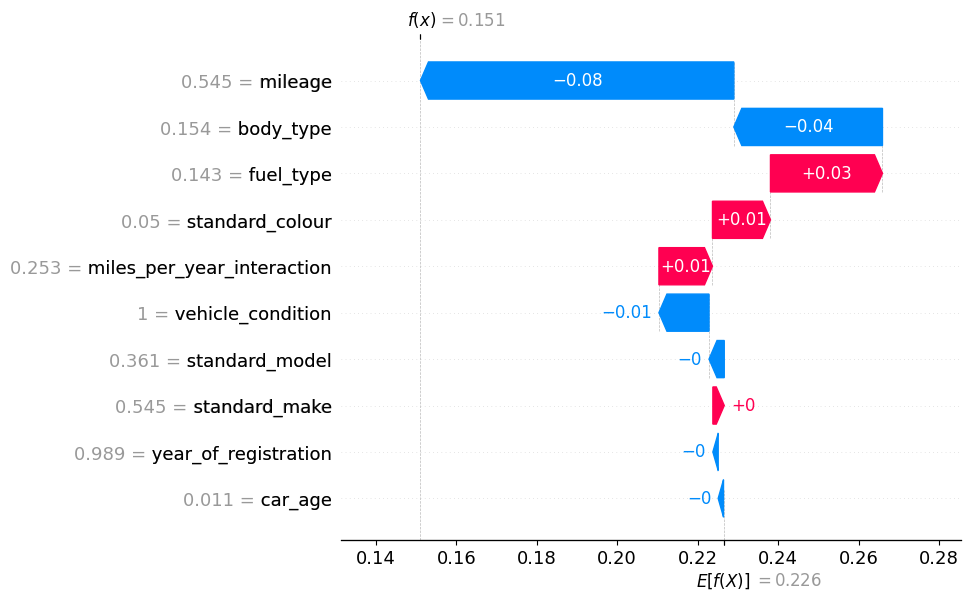

In [122]:
shap.plots.waterfall(shap_values[0])

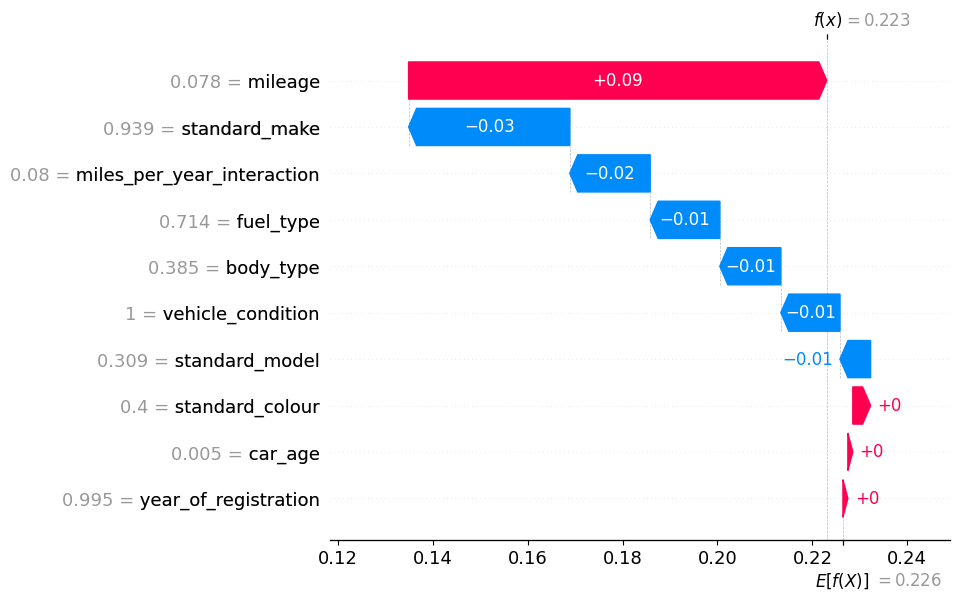

In [123]:
shap.waterfall_plot(shap_values[1])
# global model

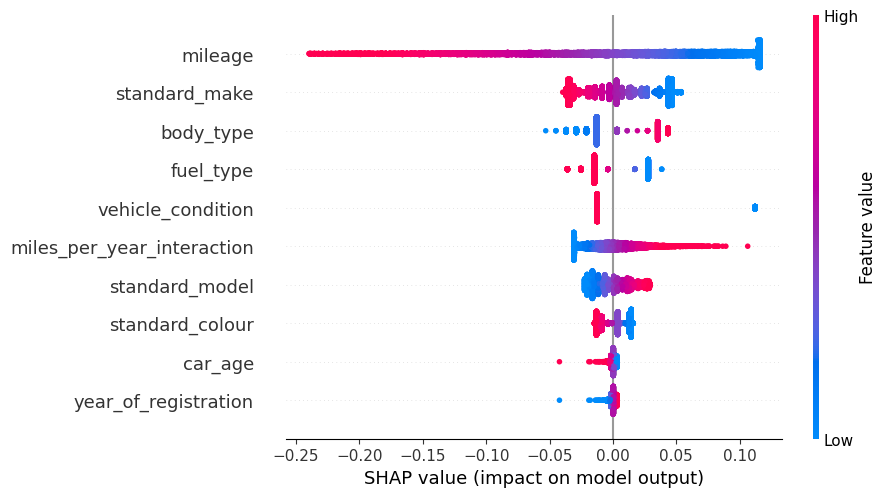

In [124]:
shap.plots.beeswarm(shap_values)

In [130]:
# Assuming the Random Forest model is already trained
model = rf_regressor
model.fit(X_train, y_train)

# Evaluate model using cross-validation`
eval_results = cross_validate(
    model, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
print("Test MAE:", -eval_results['test_score'].mean(), "Std Dev:", eval_results['test_score'].std())
print("Train MAE:", -eval_results['train_score'].mean(), "Std Dev:", eval_results['train_score'].std())

# Display feature importances from the Random Forest model

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(model.feature_importances_, 3)
}).sort_values(by='importance', ascending=False)
print(feature_importances)

# Use a smaller sample for SHAP to save time and memory
sample_size = 100  # Adjust as needed
X_sample = X_test[:sample_size]

Test MAE: 0.03229405466078554 Std Dev: 0.000589621730754899
Train MAE: 0.01250848192980766 Std Dev: 5.487888581881788e-05
                      feature  importance
5        year_of_registration       0.192
9                     car_age       0.176
3              standard_model       0.172
2               standard_make       0.157
6                   body_type       0.147
7                   fuel_type       0.054
0                     mileage       0.050
8  miles_per_year_interaction       0.038
1             standard_colour       0.015
4           vehicle_condition       0.001


In [131]:
# Initialize the SHAP explainer with the trained Random Forest model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the sample
shap_values = explainer.shap_values(X_sample)

In [132]:
# Convert SHAP values to a DataFrame for easier handling
shap_values_df = pd.DataFrame(shap_values, columns=X_sample.columns)

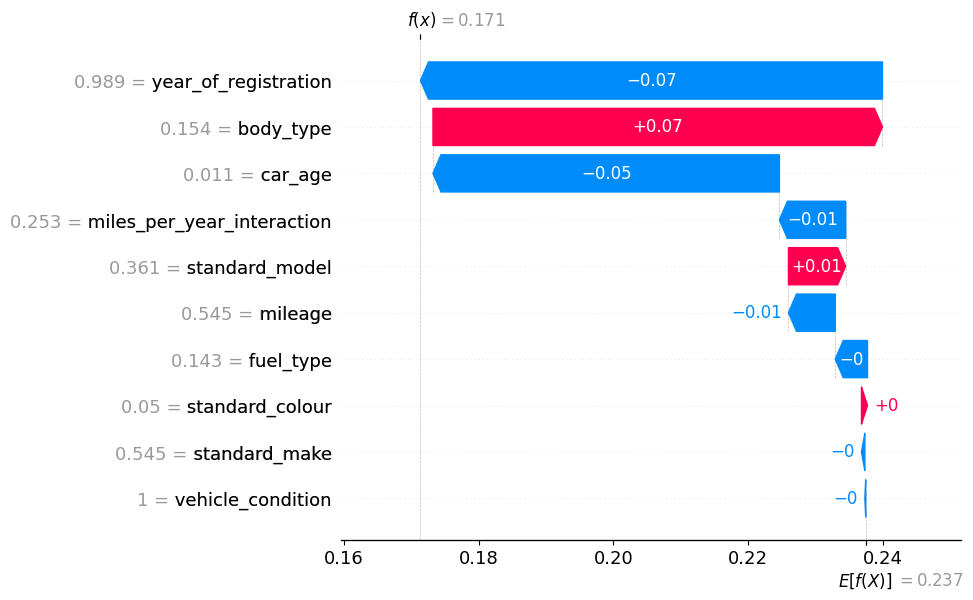

In [133]:
# Local SHAP Analysis - Waterfall Plot for a random instance
shap.initjs()
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_sample.iloc[0]))

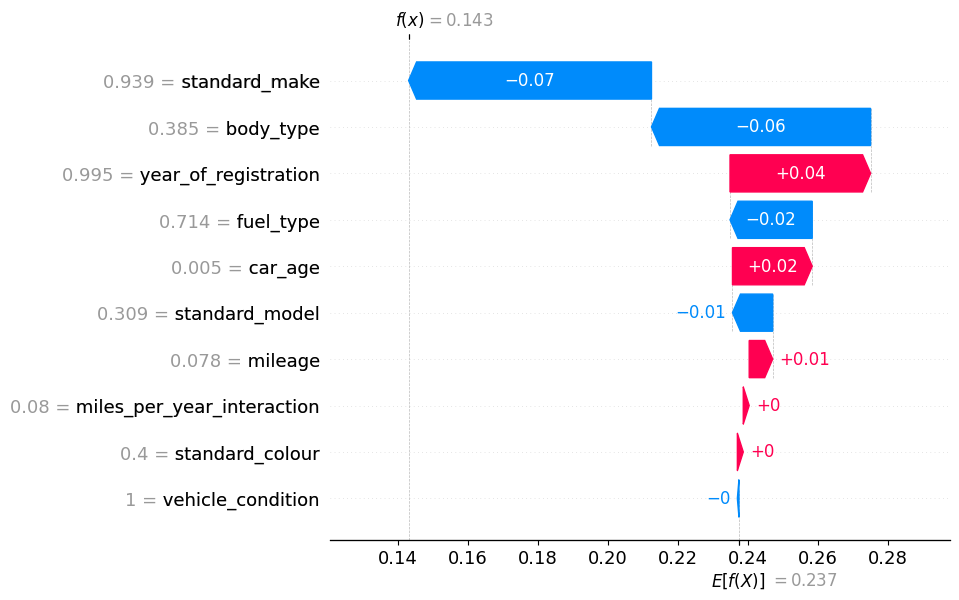

In [134]:
# Another example of Waterfall Plot for a different instance
shap.plots.waterfall(shap.Explanation(values=shap_values[1], base_values=explainer.expected_value, data=X_sample.iloc[1]))

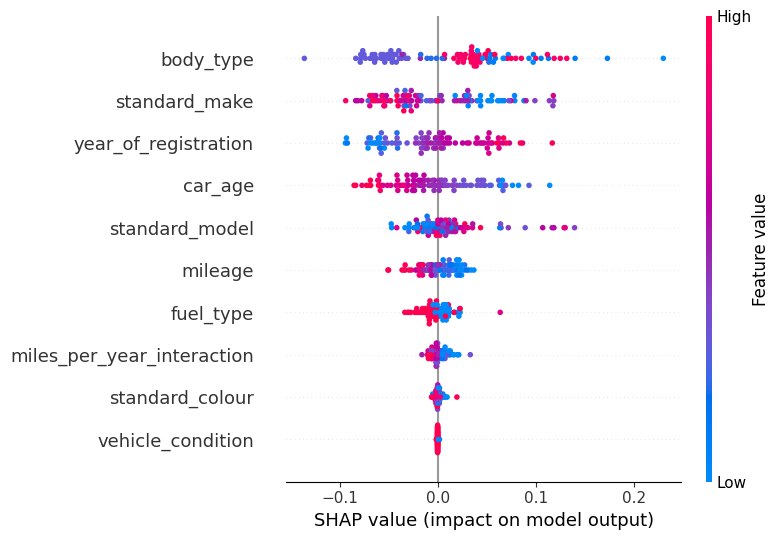

In [135]:
# Global SHAP Analysis - Beeswarm Plot
shap.summary_plot(shap_values, X_sample)

In [137]:
# fit Boosted Tree
boosted_model = GradientBoostingRegressor()
boosted_model.fit(X_train ,y_train)

# Evaluate model using cross-validation
eval_results = cross_validate(
    boosted_model, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
print("Test MAE:", -eval_results['test_score'].mean(), "Std Dev:", eval_results['test_score'].std())
print("Train MAE:", -eval_results['train_score'].mean(), "Std Dev:", eval_results['train_score'].std())

# Display feature importances from the Boosted Tree model
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(boosted_model.feature_importances_, 3)
}).sort_values(by='importance', ascending=False)
print(feature_importances)

# Use a smaller sample for SHAP to save time and memory
sample_size = 100  # Adjust as needed
X_sample = X_test[:sample_size]

Test MAE: 0.052449459571903126 Std Dev: 0.0004652522295288854
Train MAE: 0.05189361921753912 Std Dev: 0.00031604474042294667
                      feature  importance
5        year_of_registration       0.305
2               standard_make       0.203
6                   body_type       0.163
9                     car_age       0.121
3              standard_model       0.088
7                   fuel_type       0.058
0                     mileage       0.045
8  miles_per_year_interaction       0.014
1             standard_colour       0.002
4           vehicle_condition       0.000


In [138]:
# Initialize the SHAP explainer with the trained Boosted Tree model
explainer = shap.TreeExplainer(boosted_model)

# Calculate SHAP values for the sample
shap_values = explainer.shap_values(X_sample)

# Convert SHAP values to a DataFrame for easier handling
shap_values_df = pd.DataFrame(shap_values, columns=X_sample.columns)

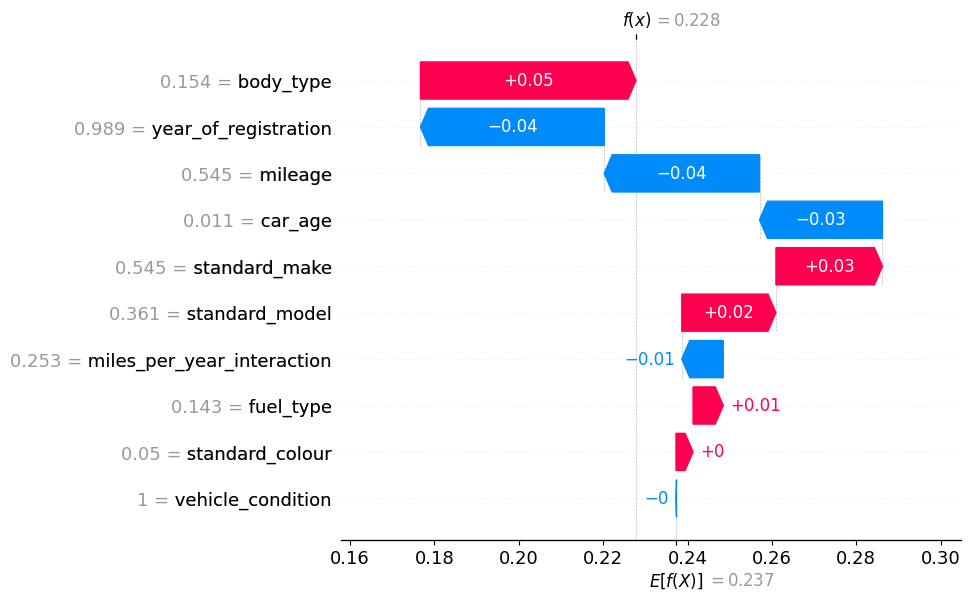

In [139]:
# Local SHAP Analysis - Waterfall Plot for a random instance
shap.initjs()
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_sample.iloc[0]))

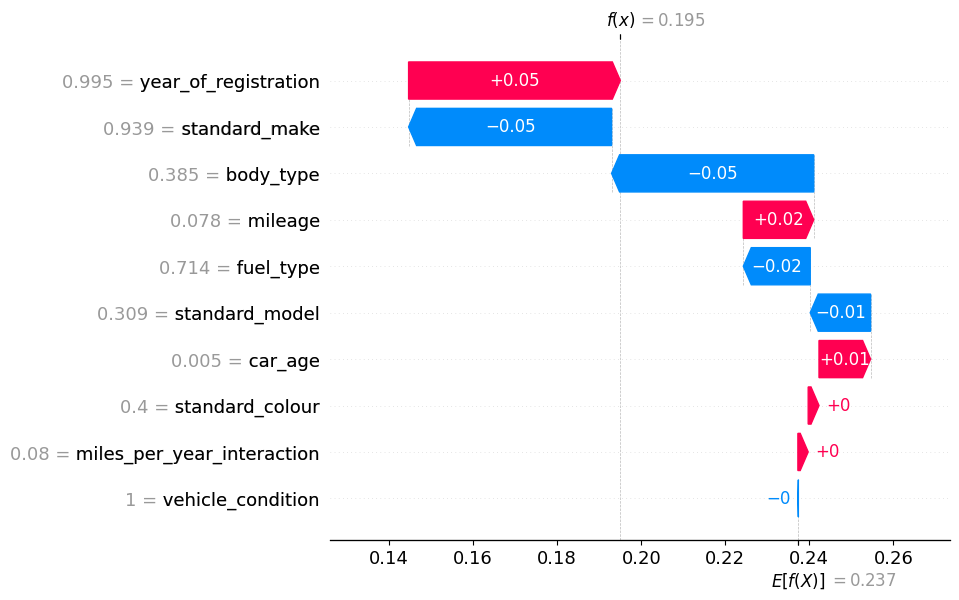

In [140]:
# Another example of Waterfall Plot for a different instance
shap.plots.waterfall(shap.Explanation(values=shap_values[1], base_values=explainer.expected_value, data=X_sample.iloc[1]))

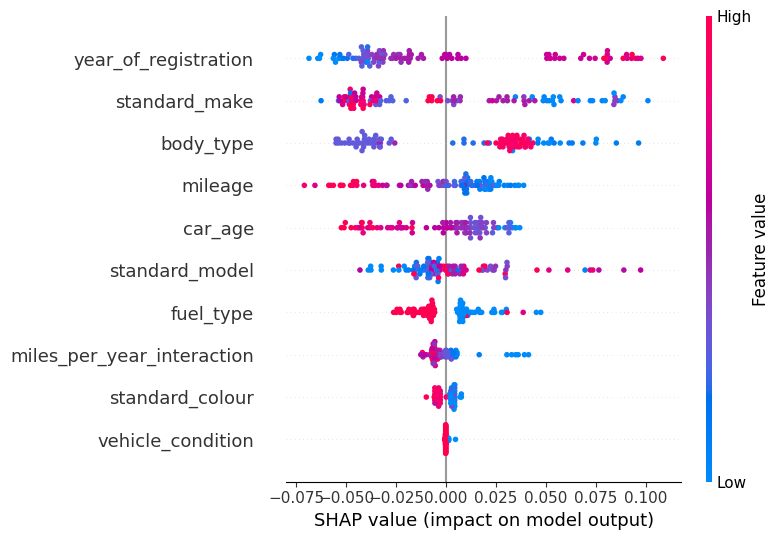

In [141]:
# Global SHAP Analysis - Beeswarm Plot
shap.summary_plot(shap_values, X_sample)

**5.4 Partial Dependency Plots**

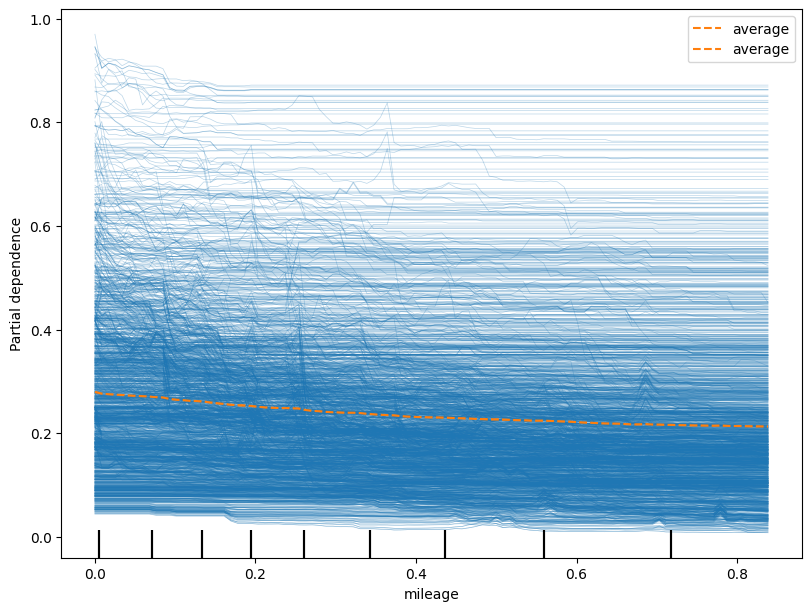

In [143]:
# PDP for RandomForest Regressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plot Partial Dependence for a single feature 'mileage'
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    rf_regressor, X_test, features=['mileage'], kind='both', ax=ax
)
display.plot(ax=display.axes_)
plt.show()

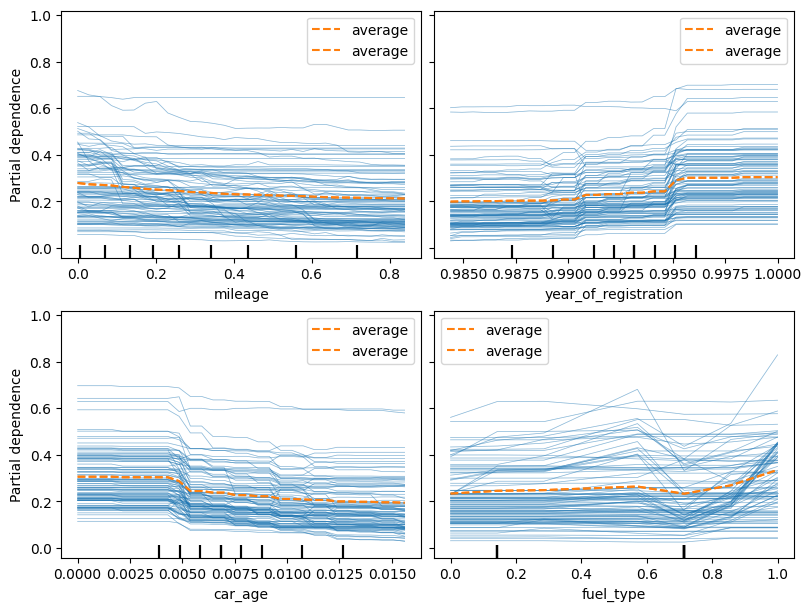

In [145]:
# Plot Partial Dependence for multiple features: 'mileage', '', 'volatile acidity', 'residual sugar'
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    rf_regressor, X_test, features=['mileage', 'year_of_registration', 'car_age', 'fuel_type'],
    kind='both', subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
)
display.plot(ax=display.axes_)
plt.show()


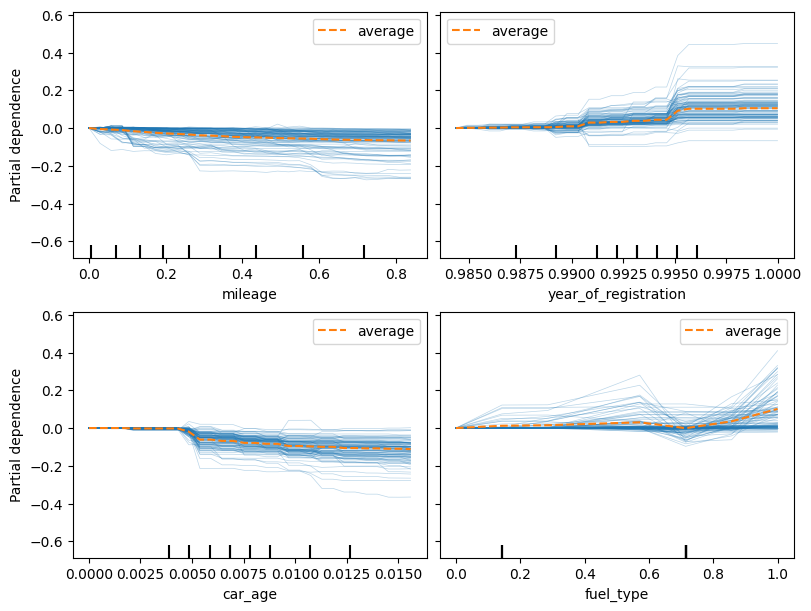

In [147]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf_regressor, X_test, features=['mileage', 'year_of_registration', 'car_age', 'fuel_type'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

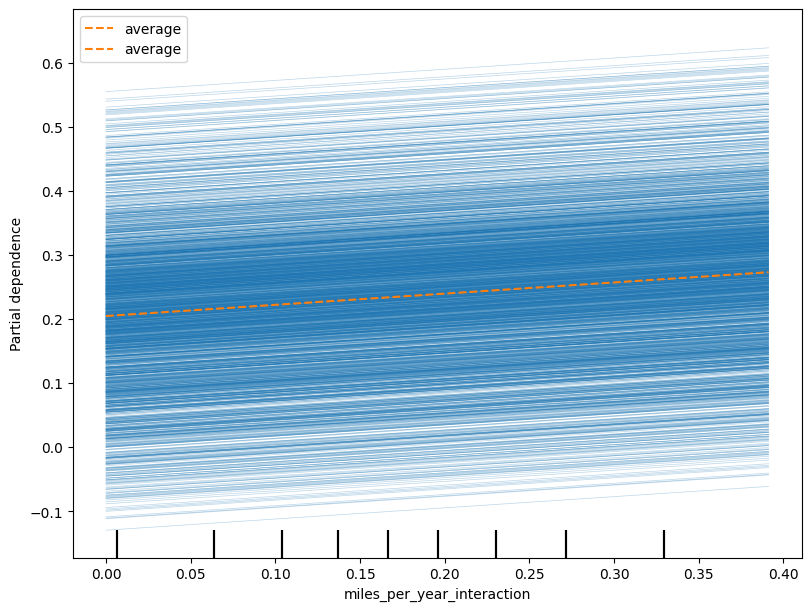

In [148]:
# PDP for Linear Regressor
# Plot Partial Dependence for a single feature 'mileage'
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    lr_model, X_test, features=['miles_per_year_interaction'], kind='both', ax=ax
)
display.plot(ax=display.axes_)
plt.show()


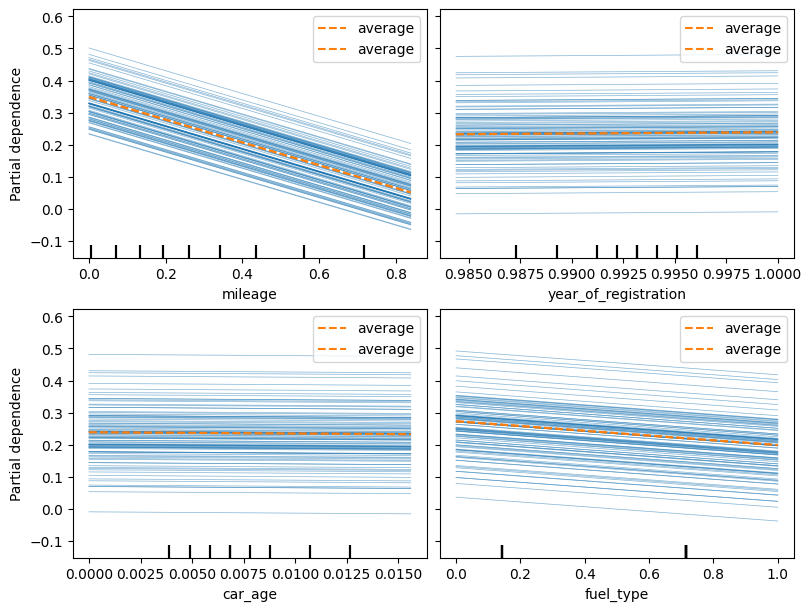

In [149]:
# Plot Partial Dependence for multiple features: 'mileage', '', 'volatile acidity', 'residual sugar'
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    lr_model, X_test, features=['mileage', 'year_of_registration', 'car_age', 'fuel_type'],
    kind='both', subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
)
display.plot(ax=display.axes_)
plt.show()


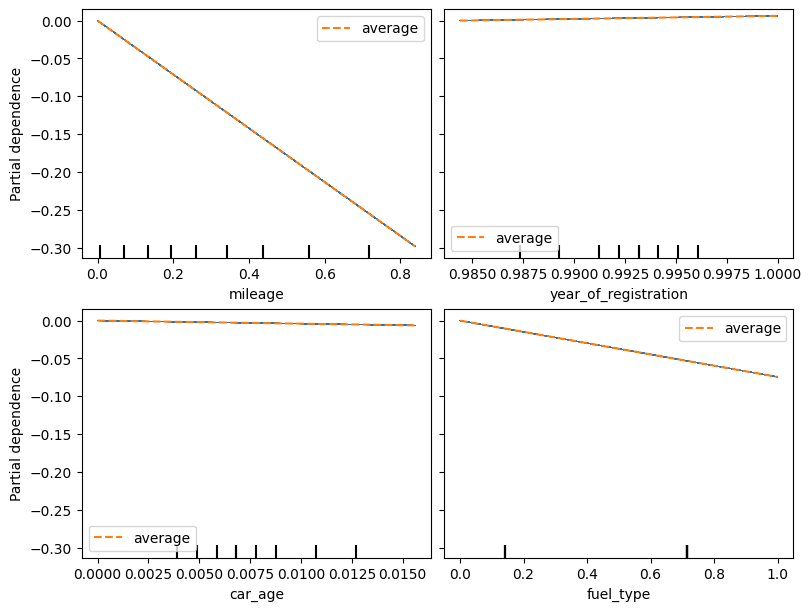

In [151]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lr_model, X_test, features=['mileage', 'year_of_registration', 'car_age', 'fuel_type'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

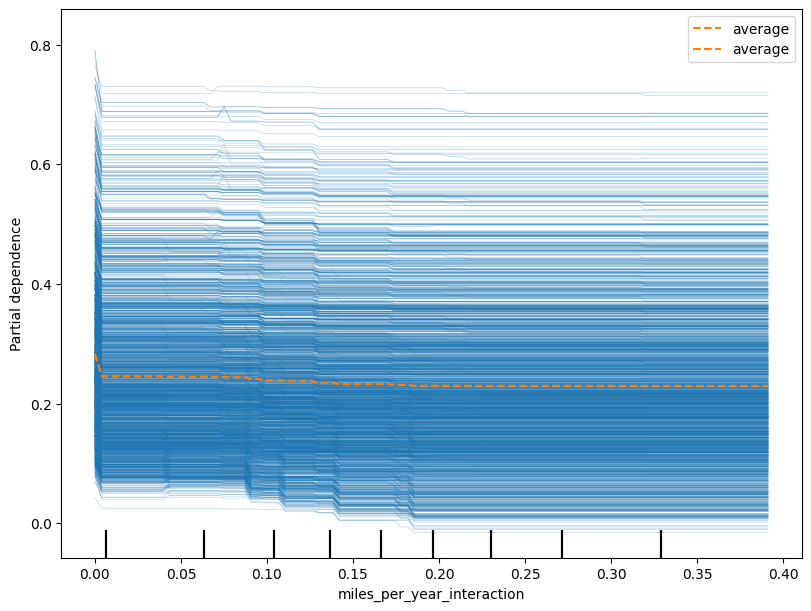

In [153]:
# PDP for Boosted Tree
# Fit the boosted tree model with training data
boosted_regressor.fit(X_train, y_train)

# Plot Partial Dependence for a single feature 'miles_per_year_interaction'
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    boosted_regressor, X_test, features=['miles_per_year_interaction'], kind='both', ax=ax
)
display.plot(ax=display.axes_)
plt.show()

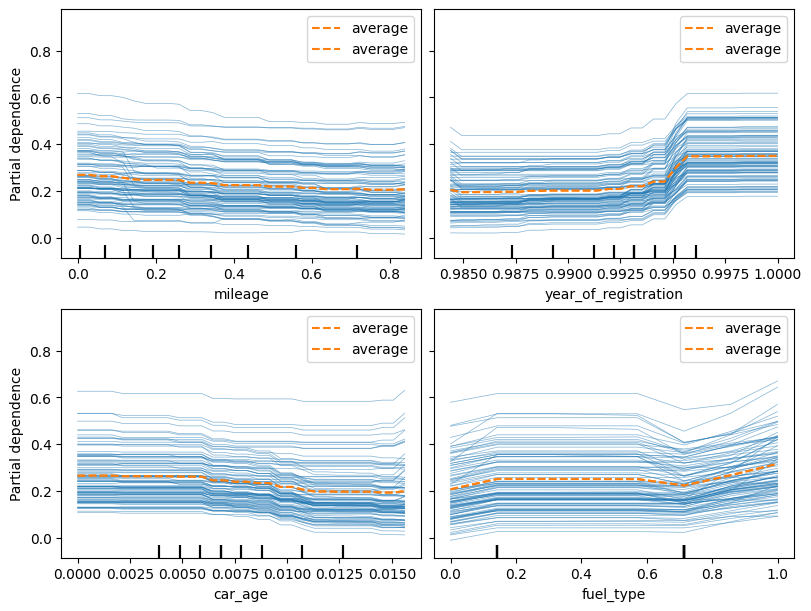

In [154]:
# Plot Partial Dependence for multiple features: 'mileage', '', 'volatile acidity', 'residual sugar'
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    boosted_regressor, X_test, features=['mileage', 'year_of_registration', 'car_age', 'fuel_type'],
    kind='both', subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
)
display.plot(ax=display.axes_)
plt.show()

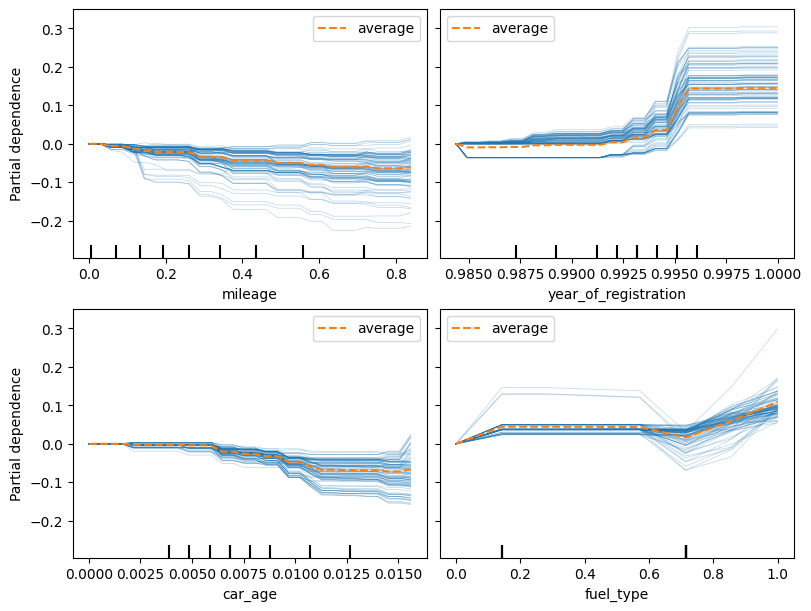

In [155]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    boosted_regressor, X_test, features=['mileage', 'year_of_registration', 'car_age', 'fuel_type'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);